In [6]:
# https://github.com/vignesh628/AMAZON_FINE_FOOD_REVIEWS
# https://www.kaggle.com/snap/amazon-fine-food-reviews
# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.X17FYYvhX4Y

## Imports

In [1]:
import pandas as pd
import time
import sys
import matplotlib.pyplot as plt
import random
from bs4 import BeautifulSoup
from tqdm import tqdm
import regex as re
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_frame = pd.read_csv("/content/gdrive/My Drive/amazon fine food/Reviews.csv")

## Basic data analysis

In [10]:
data_frame.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [12]:
data_frame.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [13]:
data_frame["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

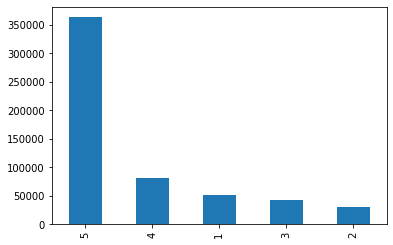

In [14]:
# Distribution of class labels
data_frame["Score"].value_counts().plot(kind="bar")

In [15]:
data_frame["ProductId"].value_counts()

B007JFMH8M    913
B002QWHJOU    632
B0026RQTGE    632
B002QWP8H0    632
B002QWP89S    632
             ... 
B004XTMYY4      1
B002ADDQEM      1
B0013T8UMW      1
B0000DBPLI      1
B001SAZHFE      1
Name: ProductId, Length: 74258, dtype: int64

In [16]:
data_frame["ProductId"].nunique(), data_frame.shape

(74258, (568454, 10))

In [17]:
data_frame["UserId"].nunique(), data_frame.shape

(256059, (568454, 10))

In [18]:
# Getting out the duplicates

data_frame[ data_frame["UserId"] == "A1Y3XPZK9ZADFW" ]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
425,426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
426,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
26000,26001,B0058AMY74,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
26001,26002,B0058AMY74,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
53474,53475,B001E5E0A6,A1Y3XPZK9ZADFW,albinocrow,2,4,1,1307577600,too dry,I found these in a local grocery story and wan...
56516,56517,B0012XBD7I,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
56517,56518,B0012XBD7I,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
67738,67739,B000G6MBUA,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
67739,67740,B000G6MBUA,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
78529,78530,B00472I5A4,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."


In [19]:
# Dupliacte rows

data_frame[data_frame[["ProductId","UserId"]].duplicated() == True]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
426,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
429,430,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1331078400,Kettle potato chips: Sweet onion,WOW! I have eaten quite a few potato chips in...
435,436,B000G6RYNE,A15USNEAJUXOSH,L. Schrank,0,0,5,1326067200,Delicious,"I love these chips, I buy the 24 pack once a m..."
467,468,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,1231718400,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...
485,486,B000G6RYNE,A31N6KB160O508,Fran W.,0,0,4,1214006400,Not bad but a little hard to get used to,My husband likes these a lot. They are a bit d...
...,...,...,...,...,...,...,...,...,...,...
568056,568057,B0030VJ8YU,A2P7TE7CVQAHH7,Dana Puckett,2,3,5,1302998400,My baby loves it!,I have tried this flavor first time when my so...
568060,568061,B0030VJ8YU,A39WWOFLLOQC3L,manda c,2,3,3,1287360000,Blend your own baby food,"I loved the stage 2 Spinach Mango Pear, althou..."
568062,568063,B0030VJ8YU,ATIHDHZYNQ0EI,"Kristen O'donnell ""twinsmom""",2,3,5,1270425600,Organic and tasty!,I have 12 month olds and no time to write a gr...
568067,568068,B0030VJ8YU,AL4269Y3JX766,NewMama,0,0,3,1336521600,Original Recipe was better.....baby no longer ...,Unfortunately they changed the recipe up on ou...


In [20]:
data_frame[data_frame[["ProductId","UserId"]].duplicated() == True].shape , data_frame.shape


# Almost 7k duplicate rows on combining ProductId and UserId

((7650, 10), (568454, 10))

In [21]:
# Percentage of duplicates
data_frame[data_frame[["ProductId","UserId"]].duplicated() == True].shape[0]/data_frame.shape[0] * 100


# Almost 1.3 percent of total data is duplicates.
# Lets drop that dupliates

1.34575532936702

In [4]:
new_df = data_frame[data_frame[["ProductId","UserId"]].duplicated() == False]

In [5]:
data_frame.shape, new_df.shape

((568454, 10), (560804, 10))

In [6]:
new_df["ProductId"].nunique()

74258

## Observation:

* The data set is imbalanced
* Duplicates are removed (1.3% of data)
* 560804 datapoints 
* Only these columns are taken into account (ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score)
* The problem can be posed as Multiclass classification or Binary classification or summary geneartion from text.
* Here 1st i am taking the problem as binary classification (apply a fn on top of Score to make it binary)
* The review is for 74258 Unique products

## Preprocessing

In [7]:
# picking 20 random data points:
ran_list = [162562,
 162472,
 145133,
 445127,
 352287,
 162157,
 20763,
 464061,
 530365,
 493235,
 208760,
 475936,
 253365,
 95367,
 339008,
 177655,
 242251,
 89569,
 260490,
 519461]
for x in ran_list:
  print(new_df["Text"][x])

These crackers are a great item to have on hand.  They are healthy and I eat them with almost everything from cheese, chicken salad, salsa, and hummus.  Buying them on Amazon is a great way to save money and to buy in bulk.
My husband and I are very satisfied with this product.  Not only is it organic, it is easily digestible, and my daughter loves it.  We have tried a couple of different products to mix with veggies and fruits for dinnertime and the Happy Bellies Brown Rice Cereal is by far my daughter's favorite.
And if Mother loves it then you know it's good.  She's commented on it multiple times and I'm sending another order.
a wonderful salt for almost anything. is really good to put on steaks and then tenderize. makes the meat very tender and hold in juices. My favorite cooking salt by far.
The coffees are great, if you can get one that doesnt bust open while brewing and ruin your coffee! its good if you are looking for a bargain and dont mind making a second cup very once and a 

In [8]:
# for x in ran_list:
#   soup = BeautifulSoup(new_df["Text"][x], 'lxml')
#   print(soup.get_text())

In [9]:
sentance = "http hello 66 +"
sentance = re.sub("\S*\d\S*", "", sentance).strip()
print(sentance)

http hello  +


In [25]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [26]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(new_df['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280 # Stopword list
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 560804/560804 [04:45<00:00, 1962.70it/s]


In [28]:
len(preprocessed_reviews), new_df.shape

(560804, (560804, 11))

In [29]:
preprocessed_reviews[:10]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal',
 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much red black licorice flavored pieces

In [30]:
new_df["Text"][:10]

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: Text, dtype: object

In [31]:
# After pre-processing
for x in range(10):
  print(new_df["Text"][x])
  print(preprocessed_reviews[x])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of 

In [32]:
new_df["cleaned_text"] = preprocessed_reviews
new_df.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,bi_Score,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...


## Train test split

* This data is non temporial nature
* hence splitting can be done randomly

In [33]:
def score_change(score):
  if score >= 3:
    return 1
  else:
    return 0

In [34]:
new_df["bi_Score"] = new_df["Score"].apply(score_change)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
new_df["bi_Score"].value_counts()

1    479799
0     81005
Name: bi_Score, dtype: int64

In [36]:
new_df["Score"].value_counts()

5    358251
4     79509
1     51532
3     42039
2     29473
Name: Score, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# As considering this as complete NLP problem, taking only text data and manipulating that alone.

X = new_df[["cleaned_text"]]
y = new_df[["bi_Score"]]

In [39]:
X.shape, y.shape

((560804, 1), (560804, 1))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((375738, 1), (185066, 1), (375738, 1), (185066, 1))

In [41]:
X_train["cleaned_text"].values

array(['love tea caffeine free naturally sweet relaxing blend mint chamomile perfect',
       'well sure literally chocolate water tastes terrible not creamy rich good fiance likes iced coffee brew one chocolate one coffee needs milk tastes ok not',
       'found taste really good also not salty spicy right chips crunchy though may not important right size',
       ...,
       'description said flavors mix grape lemon lime cherry orange bag orange apple cherry strawberry strawberry cherry orange one yellowish one apple two slightly different red pink ones not determine exact flavor however good apple especially good would get even though not certain flavors would receive would not matter good regardless',
       'surprisingly lightly flavored tea great chocolate aftertaste adding little milk honey hot tea enhance flavor',
       'would not spent much bubblegum not fact grandchild bazooka guess catch us'],
      dtype=object)

#### Trying to Visualize the max occurence words in the text corpus

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm


def display_word_cloud(df_text, word_limit):
  word_limit = 100000
  count = 0
  word_sentence = ""
  for text in tqdm(X_train["cleaned_text"].values):
    #print(text)
    count += 1
    if count == word_limit:
        break
    for words in text.split(" "):
      #print(words)
      word_sentence += "".join(words) + " "
  print(word_sentence)


  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(word_sentence) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 

 26%|██▌       | 96027/375738 [00:02<00:06, 45307.15it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



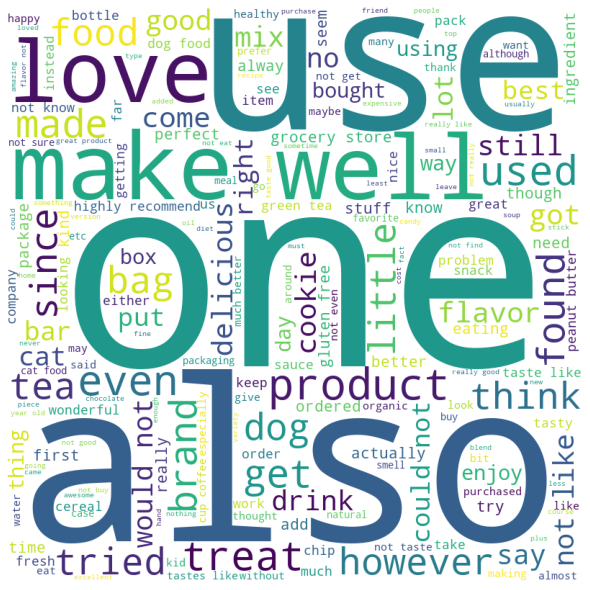

In [41]:
display_word_cloud(X_train["cleaned_text"].values, word_limit=100000)

### Here we splitted the data before BOW, Tfidf, Avg-W2v, Tfidf-weighted W2v to avoid the data leakage

# Bow

In [42]:
# Bow
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
bow_vectorizer  = CountVectorizer(ngram_range=(1,1), max_features=100000, min_df=2) # inilizating with min_df = 2 (Picking only occurence of atleast 2) 
bow_vectorizer.fit(X_train["cleaned_text"].values)

X_train_bow = bow_vectorizer.transform(X_train["cleaned_text"].values) # App
X_test_bow = bow_vectorizer.transform(X_test["cleaned_text"].values)

In [48]:
len(bow_vectorizer.get_feature_names())

55869

# Tfidf

In [50]:
# Tfidf (TERM FREQUENCY AND INVERSE TERM FREQUECY)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer  = TfidfVectorizer(ngram_range=(1,1), max_features=100000, min_df=2) # inilizating with min_df = 2 (Picking only occurence of atleast 2) 
tfidf_vectorizer.fit(X_train["cleaned_text"].values)

X_train_tfidf = tfidf_vectorizer.transform(X_train["cleaned_text"].values) # App
X_test_tfidf = tfidf_vectorizer.transform(X_test["cleaned_text"].values)

In [52]:
len(tfidf_vectorizer.get_feature_names())

55869

In [65]:
tfidf_vectorizer.idf_

array([ 9.72577617, 10.43545265, 11.63942546, ..., 12.45035567,
       12.22721212, 12.73803774])

## Training own Word2Vec

In [72]:
list_of_sentance=[]
for sentance in tqdm(X_train["cleaned_text"].values):
    list_of_sentance.append(sentance.split())

list_of_sentance[0]

100%|██████████| 375738/375738 [00:03<00:00, 109544.87it/s]


['love',
 'tea',
 'caffeine',
 'free',
 'naturally',
 'sweet',
 'relaxing',
 'blend',
 'mint',
 'chamomile',
 'perfect']

In [78]:
from gensim.models import Word2Vec
# Generating 50 dimentional word, picking min_count as 5 for the list if list
own_w2v = Word2Vec(list_of_sentance,min_count=1,size=50, workers=4)

In [80]:
# Similar word based on our training.
own_w2v.wv.most_similar(positive="good")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('great', 0.8705631494522095),
 ('decent', 0.8438513278961182),
 ('okay', 0.737471878528595),
 ('awesome', 0.7277710437774658),
 ('amazing', 0.7128795981407166),
 ('bad', 0.7084839344024658),
 ('like', 0.7071053981781006),
 ('fantastic', 0.704797089099884),
 ('fine', 0.6989807486534119),
 ('alright', 0.6940258145332336)]

In [86]:
own_w2v.wv.similarity("hello","bad")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.12555367

In [93]:
# the 50 dimentional word representation
len(own_w2v.wv.vectors[0])

50

### Average W2v for self-trained W2v model

In [43]:
def avg_w2v(w2v_model,text_list):
  w2v_words = list(w2v_model.wv.vocab)
  sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sent in tqdm(text_list): # for each review/sentence
      sent_vec = np.zeros(300) # as word vectors are of of length 50
      cnt_words =0; # num of words with a valid vector in the sentence/review
      for word in sent.split(' '): # for each word in a review/sentence
        if word in w2v_words:
              vec = w2v_model.wv[word]
              sent_vec += vec
              cnt_words += 1
      if cnt_words != 0:
          sent_vec /= cnt_words
      sent_vectors.append(sent_vec)
  print(len(sent_vectors))
  print(len(sent_vectors[0]))
  return sent_vectors

In [100]:
# own_w2v is trained only on train data
# Here each sentence is being converted into 50 dimentional vector, the vector is formed by same text corpous
X_train_own_w2v = avg_w2v(w2v_model=own_w2v, text_list = X_train["cleaned_text"].values) # App
X_test_own_w2v = avg_w2v(w2v_model=own_w2v, text_list = X_test["cleaned_text"].values) # App

  0%|          | 33/185066 [00:00<09:27, 326.08it/s]

375738
50


100%|██████████| 185066/185066 [15:09<00:00, 203.47it/s]

185066
50


In [104]:
type(X_train_own_w2v), type(X_test_own_w2v), len(X_train_own_w2v)

(list, list, 375738)

In [118]:
# Lets save this sentence vetor to drive and we can readit back, insted of forming training vector again
import pickle
with open('/content/gdrive/My Drive/amazon fine food/X_train_own_w2v.pkl', 'wb') as f:
  pickle.dump(X_train_own_w2v, f)

with open('/content/gdrive/My Drive/amazon fine food/X_test_own_w2v.pkl', 'wb') as f:
  pickle.dump(X_test_own_w2v, f)

In [116]:
with open('/content/gdrive/My Drive/amazon fine food/X_train_own_w2v.pkl', 'rb') as f:
  X_train_own_w2v = pickle.load(f)

with open('/content/gdrive/My Drive/amazon fine food/X_test_own_w2v.pkl', 'rb') as f:
  X_test_own_w2v = pickle.load(f)

### Average W2v for pre-trained W2v model

In [119]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [120]:
from gensim.models import KeyedVectors
pre_trained_link = 'https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?usp=sharing'

In [121]:
downloaded = drive.CreateFile({'id':"0B7XkCwpI5KDYNlNUTTlSS21pQmM"})
downloaded.GetContentFile('GoogleNews-vectors-negative300.bin.gz')

In [126]:
! gunzip GoogleNews-vectors-negative300.bin.gz

In [16]:
from gensim.models import KeyedVectors
w2v_model_pretrained = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
w2v_model_pretrained.wv.most_similar(positive="good")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# own_w2v is trained only on train data
# Here each sentence is being converted into 50 dimentional vector, the vector is formed by same text corpous
X_train_google_w2v = avg_w2v(w2v_model=w2v_model_pretrained, text_list = X_train["cleaned_text"].values) # App
X_test_google_w2v = avg_w2v(w2v_model=w2v_model_pretrained, text_list = X_test["cleaned_text"].values) # App
print("Done")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
  0%|          | 0/375738 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
 19%|█▉        | 72174/375738 [1:40:34<9:29:04,  8.89it/s] 

In [ ]:
# Lets save this sentence vetor to drive and we can readit back, insted of forming training vector again
import pickle
with open('/content/gdrive/My Drive/amazon fine food/X_train_google_w2v.pkl', 'wb') as f:
  pickle.dump(X_train_google_w2v, f)

with open('/content/gdrive/My Drive/amazon fine food/X_test_google_w2v.pkl', 'wb') as f:
  pickle.dump(X_test_google_w2v, f)

print("Done")